In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
from scipy.integrate import solve_ivp

In [2]:
'''
This function uses experimental rate constants as a function of 
temperature for the calculation of the concentrations of A, B, C, D, E,
and F as a function of time, from a given reaction network.

MATLAB code: Thomas Dursch September 29th, 2009
Python code: Junbo Fu Aug. 23rd, 2023 

The reaction network is: A + B --> C --> D A + D <---> E 2E --> F 
which all occur in parallel. 
'''

'\nThis function uses experimental rate constants as a function of \ntemperature for the calculation of the concentrations of A, B, C, D, E,\nand F as a function of time, from a given reaction network.\n\nMATLAB code: Thomas Dursch September 29th, 2009\nPython code: Junbo Fu Aug. 23rd, 2023 \n\nThe reaction network is: A + B --> C --> D A + D <---> E 2E --> F \nwhich all occur in parallel. \n'

In [8]:
#Defining constants:
#Pre-exponential Factors:
k1p = 100000 # [=] mM^-1*s^-1
k2p = 13000 # [=] s^-1
k3p = 500 # [=] mM^-1*s^-1
k3rp = 22000 # [=] s^-1
k4p= 1.6*10**8 # [=] mM^-1*s^-1

#Actvation Energies [=] J/mol:
Ea1 = 44000
Ea2 = 28000
Ea3 = 21000
Ea3r = 35000
Ea4 = 66000

R = 8.314 # Gas Constant [=] J/mol-K
T = 328 # Temperature at which the experiment was run [=] K

#Assume the rate constants have the Arrhenius Form: k(T) =
#kxp*exp(-Ea/(R*T)):

k1 = k1p*np.exp(-Ea1/(R*T)) # A + B --> C
k2 = k2p*np.exp(-Ea2/(R*T)) # C --> D
k3 = k3p*np.exp(-Ea3/(R*T)) # A + D --> E
k3r = k3rp*np.exp(-Ea3r/(R*T)) # E --> A + D
k4 = k4p*np.exp(-Ea4/(R*T)) # 2E --> F

C = np.zeros(6)


In [10]:
def diffeq (t,f):
#This function is used in the ODE solver - it is the rate equations that
#will be solved by the ODE solver.

    df = np.zeros(6); # Creates a zeros vector where the solutions to the ODEs 
    #will be stored.  It is a 6 species x 1 solution vector.

    #Rate Equations: f(1)=A, f(2)=B, f(3)=C, f(4)=D, f(5)=E, f(6)=F
    df[0] = - k1 * f[0] * f[1] - k3 * f[0] * f[3] + k3r * f[4]
    df[1] = - k1 * f[0] * f[1]
    df[2] = k1 * f[0] * f[1] - k2 * f[2]
    df[3] = k2 * f[2] - k3 * f[0] * f[3] + k3r * f[4]
    df[4] = k3 * f[0] * f[3] - k3r * f[4] - 2 * k4 * f[4] * f[4]
    df[5] = k4 * f[4] * f[4]

    #Define f(i) as the vector C in order to report the values at time t=tspan.
    C[0] = f[0]
    C[1] = f[1]
    C[2] = f[2]
    C[3] = f[3]
    C[4] = f[4]
    C[5] = f[5]

    return df

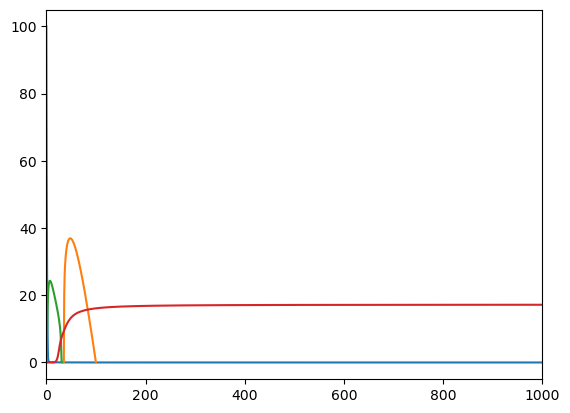

In [15]:
#Initial Conditions [=] mMol:
initial = [100, 100, 0, 0, 0, 0]
tspan = [0, 10000]

# Solve ODE
results = solve_ivp(diffeq, tspan, initial, method='RK45', rtol=1e-04, dense_output=True)
t = results.t
y = results.y
# Plot the result
plt.figure()
plt.plot(t, *y) # Don't worry about the *; they're just to "unpack" the arrays
plt.xlim([0,1000])
'''
plt.xlim([0, 12])
plt.xlabel('t, min')
plt.ylim([0, 8])
plt.ylabel('h, ft')
plt.text(1, 5.5, 'transient tank filling')
'''
plt.show()